# Basic Viewer
Ingest the alphas data and try to recreate an image using full sorting.

## Inspect the data.

In [1]:
import numpy as np
import polars as pl

In [2]:
data = pl.scan_csv('data/alpha_vals.csv', infer_schema_length=757)
data.head().collect()

pixelNum,out_color_r,out_color_g,out_color_b,bg_color_r,bg_color_g,bg_color_b,Gaussian_0_alpha,Gaussian_0_depth,Gaussian_0_color_r,Gaussian_0_color_g,Gaussian_0_color_b,Gaussian_1_alpha,Gaussian_1_depth,Gaussian_1_color_r,Gaussian_1_color_g,Gaussian_1_color_b,Gaussian_2_alpha,Gaussian_2_depth,Gaussian_2_color_r,Gaussian_2_color_g,Gaussian_2_color_b,Gaussian_3_alpha,Gaussian_3_depth,Gaussian_3_color_r,Gaussian_3_color_g,Gaussian_3_color_b,Gaussian_4_alpha,Gaussian_4_depth,Gaussian_4_color_r,Gaussian_4_color_g,Gaussian_4_color_b,Gaussian_5_alpha,Gaussian_5_depth,Gaussian_5_color_r,Gaussian_5_color_g,Gaussian_5_color_b,…,Gaussian_142_color_g,Gaussian_142_color_b,Gaussian_143_alpha,Gaussian_143_depth,Gaussian_143_color_r,Gaussian_143_color_g,Gaussian_143_color_b,Gaussian_144_alpha,Gaussian_144_depth,Gaussian_144_color_r,Gaussian_144_color_g,Gaussian_144_color_b,Gaussian_145_alpha,Gaussian_145_depth,Gaussian_145_color_r,Gaussian_145_color_g,Gaussian_145_color_b,Gaussian_146_alpha,Gaussian_146_depth,Gaussian_146_color_r,Gaussian_146_color_g,Gaussian_146_color_b,Gaussian_147_alpha,Gaussian_147_depth,Gaussian_147_color_r,Gaussian_147_color_g,Gaussian_147_color_b,Gaussian_148_alpha,Gaussian_148_depth,Gaussian_148_color_r,Gaussian_148_color_g,Gaussian_148_color_b,Gaussian_149_alpha,Gaussian_149_depth,Gaussian_149_color_r,Gaussian_149_color_g,Gaussian_149_color_b
i64,f64,f64,f64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0,0.816958,0.582506,0.349349,0,0,0,0.004149,4.89715,0.266108,0.328284,0.169247,0.004166,5.77093,0.896588,0.370032,0.0943832,0.008228,7.40858,1.17165,0.853375,0.221689,0.0363499,7.69578,0.819721,0.586835,0.354065,0.0778933,7.6974,0.815328,0.564429,0.347331,0.011101,7.69983,0.831183,0.594355,0.37644,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.765177,0.523946,0.276409,0,0,0,0.004116,4.89715,0.266108,0.328284,0.169247,0.004113,5.77093,0.896588,0.370032,0.0943832,0.008287,7.40858,1.17165,0.853375,0.221689,0.007049,7.69338,0.629764,0.397353,0.177138,0.0373361,7.6974,0.815328,0.564429,0.347331,0.006836,7.70673,0.815867,0.580568,0.376779,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.667211,0.440587,0.220319,0,0,0,0.004083,4.89715,0.266108,0.328284,0.169247,0.004061,5.77093,0.896588,0.370032,0.0943832,0.008344,7.40858,1.17165,0.853375,0.221689,0.0148661,7.69338,0.629764,0.397353,0.177138,0.016208,7.6974,0.815328,0.564429,0.347331,0.017113,7.70549,0.673684,0.446163,0.224626,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.633949,0.414435,0.202898,0,0,0,0.00405,4.89715,0.266108,0.328284,0.169247,0.004008,5.77093,0.896588,0.370032,0.0943832,0.008401,7.40858,1.17165,0.853375,0.221689,0.0293894,7.69338,0.629764,0.397353,0.177138,0.007505,7.69641,0.651232,0.359302,0.0,0.006372,7.6974,0.815328,0.564429,0.347331,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.630513,0.402237,0.185783,0,0,0,0.004017,4.89715,0.266108,0.328284,0.169247,0.003955,5.77093,0.896588,0.370032,0.0943832,0.008456,7.40858,1.17165,0.853375,0.221689,0.0544626,7.69338,0.629764,0.397353,0.177138,0.0142788,7.69641,0.651232,0.359302,0.0,0.0324201,7.70549,0.673684,0.446163,0.224626,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Create image from out color.

In [3]:
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
# Select the out color columns.
out_colors_raw = data.select(pl.col("out_color_r", "out_color_g", "out_color_b")).collect().to_numpy()

In [5]:
# Get the width and height of the image.
ground_truth_image = Image.open('data/gt.png')
image_width = ground_truth_image.width
image_height = ground_truth_image.height

## Convert linearized RGB data to w x h x 3 image.

In [6]:
out_colors = out_colors_raw.reshape((image_height, image_width, 3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0332].


(np.float64(-0.5), np.float64(1263.5), np.float64(831.5), np.float64(-0.5))

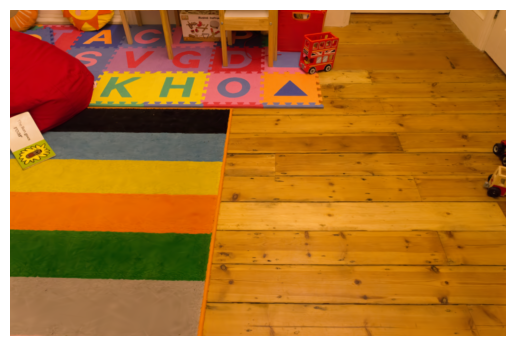

In [7]:
plt.imshow(out_colors)
plt.axis('off')

# Create image by computation.

In [8]:
# Collect all splat columns.
splats_raw = data.select(
    pl.all().exclude("pixelNum", "out_color_r", "out_color_g", "out_color_b", "bg_color_r", "bg_color_g", "bg_color_b"))
splats_raw.head().collect()

Gaussian_0_alpha,Gaussian_0_depth,Gaussian_0_color_r,Gaussian_0_color_g,Gaussian_0_color_b,Gaussian_1_alpha,Gaussian_1_depth,Gaussian_1_color_r,Gaussian_1_color_g,Gaussian_1_color_b,Gaussian_2_alpha,Gaussian_2_depth,Gaussian_2_color_r,Gaussian_2_color_g,Gaussian_2_color_b,Gaussian_3_alpha,Gaussian_3_depth,Gaussian_3_color_r,Gaussian_3_color_g,Gaussian_3_color_b,Gaussian_4_alpha,Gaussian_4_depth,Gaussian_4_color_r,Gaussian_4_color_g,Gaussian_4_color_b,Gaussian_5_alpha,Gaussian_5_depth,Gaussian_5_color_r,Gaussian_5_color_g,Gaussian_5_color_b,Gaussian_6_alpha,Gaussian_6_depth,Gaussian_6_color_r,Gaussian_6_color_g,Gaussian_6_color_b,Gaussian_7_alpha,Gaussian_7_depth,…,Gaussian_142_color_g,Gaussian_142_color_b,Gaussian_143_alpha,Gaussian_143_depth,Gaussian_143_color_r,Gaussian_143_color_g,Gaussian_143_color_b,Gaussian_144_alpha,Gaussian_144_depth,Gaussian_144_color_r,Gaussian_144_color_g,Gaussian_144_color_b,Gaussian_145_alpha,Gaussian_145_depth,Gaussian_145_color_r,Gaussian_145_color_g,Gaussian_145_color_b,Gaussian_146_alpha,Gaussian_146_depth,Gaussian_146_color_r,Gaussian_146_color_g,Gaussian_146_color_b,Gaussian_147_alpha,Gaussian_147_depth,Gaussian_147_color_r,Gaussian_147_color_g,Gaussian_147_color_b,Gaussian_148_alpha,Gaussian_148_depth,Gaussian_148_color_r,Gaussian_148_color_g,Gaussian_148_color_b,Gaussian_149_alpha,Gaussian_149_depth,Gaussian_149_color_r,Gaussian_149_color_g,Gaussian_149_color_b
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.004149,4.89715,0.266108,0.328284,0.169247,0.004166,5.77093,0.896588,0.370032,0.0943832,0.008228,7.40858,1.17165,0.853375,0.221689,0.0363499,7.69578,0.819721,0.586835,0.354065,0.0778933,7.6974,0.815328,0.564429,0.347331,0.011101,7.69983,0.831183,0.594355,0.37644,0.006313,7.70154,0.813649,0.589652,0.367008,0.004593,7.70392,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.004116,4.89715,0.266108,0.328284,0.169247,0.004113,5.77093,0.896588,0.370032,0.0943832,0.008287,7.40858,1.17165,0.853375,0.221689,0.007049,7.69338,0.629764,0.397353,0.177138,0.0373361,7.6974,0.815328,0.564429,0.347331,0.006836,7.70673,0.815867,0.580568,0.376779,0.007206,7.70777,0.797612,0.562344,0.340227,0.192638,7.70824,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.004083,4.89715,0.266108,0.328284,0.169247,0.004061,5.77093,0.896588,0.370032,0.0943832,0.008344,7.40858,1.17165,0.853375,0.221689,0.0148661,7.69338,0.629764,0.397353,0.177138,0.016208,7.6974,0.815328,0.564429,0.347331,0.017113,7.70549,0.673684,0.446163,0.224626,0.0640191,7.70824,0.82378,0.561061,0.305796,0.00727,7.70868,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.00405,4.89715,0.266108,0.328284,0.169247,0.004008,5.77093,0.896588,0.370032,0.0943832,0.008401,7.40858,1.17165,0.853375,0.221689,0.0293894,7.69338,0.629764,0.397353,0.177138,0.007505,7.69641,0.651232,0.359302,0.0,0.006372,7.6974,0.815328,0.564429,0.347331,0.0413023,7.70549,0.673684,0.446163,0.224626,0.006178,7.70973,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.004017,4.89715,0.266108,0.328284,0.169247,0.003955,5.77093,0.896588,0.370032,0.0943832,0.008456,7.40858,1.17165,0.853375,0.221689,0.0544626,7.69338,0.629764,0.397353,0.177138,0.0142788,7.69641,0.651232,0.359302,0.0,0.0324201,7.70549,0.673684,0.446163,0.224626,0.004629,7.70609,0.740363,0.340147,0.156675,0.0173037,7.70973,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

## Single pixel computation.

In [9]:
# Get the first pixel.
pixel_splats_raw = splats_raw.select(pl.all()).head(1).collect().to_numpy()
pixel_splats_reshaped = pixel_splats_raw.reshape((pixel_splats_raw.shape[1] // 5, 5))

In [10]:
# Convert into a depth dictionary. Depth : (alpha, color)
pixel_splats_by_depth = {depth: (alpha, np.array(color)) for alpha, depth, *color in pixel_splats_reshaped}


In [11]:
# Sort the splats by depth.
sorted_pixel_splats = sorted(pixel_splats_by_depth.items(), key=lambda x: x[0])

### Compute the pixel color.
- Transmittance starts at 1 and for each splat it is multiplied by 1 - the alpha value of the previous splat.
- Pixel color starts with the first splat's color multiplied by its alpha value.

In [12]:
transmittance = 1.0
pixel_color = np.zeros(3)

In [13]:
from tqdm.auto import tqdm

In [14]:
for splat in tqdm(sorted_pixel_splats):
    # Skip if alpha is 0.
    if splat[1][0] == 0:
        continue
    # Stop once transmittance is 0.
    if transmittance == 0:
        break
    pixel_color += splat[1][1] * splat[1][0] * transmittance
    transmittance *= 1 - splat[1][0]


  0%|          | 0/48 [00:00<?, ?it/s]

### Display the computed pixel color.

(np.float64(-0.5), np.float64(0.5), np.float64(0.5), np.float64(-0.5))

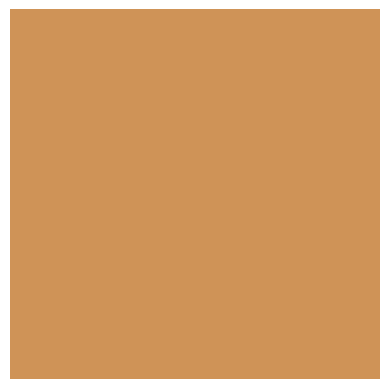

In [15]:
single_pixel_image = np.array([[pixel_color]])
plt.imshow(single_pixel_image)
plt.axis('off')

### Compare the computed pixel color with the original output value.

In [16]:
# Get the original pixel color.
original_pixel_color = data.select(pl.col("out_color_r", "out_color_g", "out_color_b")).head(1).collect().to_numpy()
print(original_pixel_color)
print(pixel_color)

[[0.816958 0.582506 0.349349]]
[0.81311349 0.57834892 0.34223245]


In [17]:
# Compute the distance.
np.linalg.norm(pixel_color - original_pixel_color)

np.float64(0.009094327820509564)

In [18]:
# Compute the percent error for each channel.
channel_error = np.abs(original_pixel_color - pixel_color) / original_pixel_color * 100
channel_error

array([[0.47058822, 0.71365369, 2.03708888]])

In [19]:
# Compute the mean percent error.
np.mean(channel_error)

np.float64(1.0737769298521156)

## Full image computation


In [20]:
from tqdm.contrib import itertools

In [21]:
# Collect all splat columns.
splats_raw_collected = splats_raw.collect().to_numpy()

In [22]:
# Reshape the splats data into h x w x splats x alpha, depth, color.
splats_reshaped = splats_raw_collected.reshape((image_height, image_width, splats_raw_collected.shape[1] // 5, 5))

In [23]:
# Convert each pixel into a depth dictionary.
sorted_splats_by_depth = np.empty((image_height, image_width), dtype=object)

for i, j in itertools.product(range(image_height), range(image_width)):
    splats_by_depth = {depth: (alpha, np.array(color)) for alpha, depth, *color in splats_reshaped[i, j]}
    sorted_splats_by_depth[i, j] = sorted(splats_by_depth.items(), key=lambda x: x[0])

  0%|          | 0/1051648 [00:00<?, ?it/s]

In [24]:
# Setup image computation.
transmittances = np.ones((image_height, image_width))
pixel_colors = np.zeros((image_height, image_width, 3))

In [26]:
# Compute the image.
for i, j in itertools.product(range(image_height), range(image_width)):
    for splat in sorted_splats_by_depth[i, j]:
        # Skip if alpha is 0.
        if splat[1][0] == 0:
            continue
        # Stop once transmittance is 0.
        if transmittance == 0:
            break
        pixel_colors[i, j] += splat[1][1] * splat[1][0] * transmittances[i, j]
        transmittances[i, j] *= 1 - splat[1][0]

  0%|          | 0/1051648 [00:00<?, ?it/s]

### Display the computed image.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0333375915076202].


(np.float64(-0.5), np.float64(1263.5), np.float64(831.5), np.float64(-0.5))

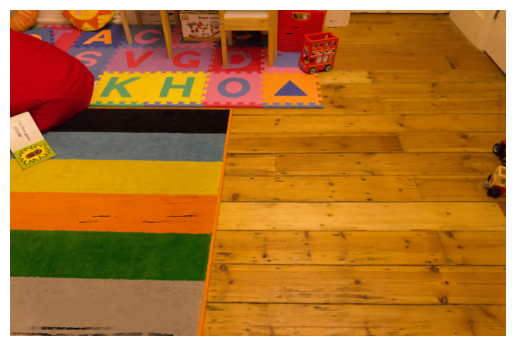

In [27]:
plt.imshow(pixel_colors)
plt.axis('off')

### Compute metrics compared to original image.


In [28]:
# Compute channel percent error.
absolute_difference = np.abs(pixel_colors - out_colors)
percent_error = absolute_difference / out_colors * 100


/var/folders/tn/ssgxjhn915v3t21pfptly0400000gn/T/ipykernel_10421/1524423297.py:3: RuntimeWarning: divide by zero encountered in divide
  percent_error = absolute_difference / out_colors * 100
/var/folders/tn/ssgxjhn915v3t21pfptly0400000gn/T/ipykernel_10421/1524423297.py:3: RuntimeWarning: invalid value encountered in divide
  percent_error = absolute_difference / out_colors * 100


In [29]:
from matplotlib.colors import LogNorm

In [30]:
# Mean percent error per pixel as a heat map
per_pixel_error = np.mean(percent_error, axis=2)

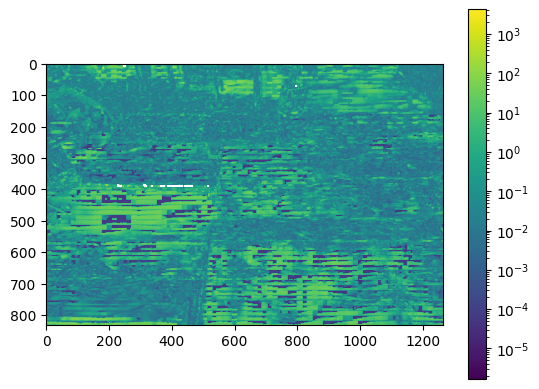

In [31]:
minimum_error = np.nanmin(per_pixel_error)
maximum_error = np.nanmax(per_pixel_error[np.isfinite(per_pixel_error)])
plt.imshow(per_pixel_error, norm=LogNorm(vmin=minimum_error, vmax=maximum_error))
plt.colorbar()